In [1]:
print("hi")

hi


In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

DataExtractionAgent=""
FinanceAgent=''
MathAgent=''
MarketAgent=''
SentimentAgent=''
SupervisorAgent=''

class FinanceState(TypedDict):
    file_path: str
    financials: dict
    ratios: dict
    market_data: dict
    sentiment: dict
    markdown_file: str
    executive_summary: str

def data_extraction_node(state: FinanceState):
    extracted = DataExtractionAgent().extract(state['file_path'])
    return {"financials": extracted}

def ratio_calc_node(state: FinanceState):
    ratios = MathAgent().compute_ratios(state['financials'])
    return {"ratios": ratios}

def market_node(state: FinanceState):
    financials = state.get("financials", {})
    symbol = financials.get("symbol")
    company_name = financials.get("company_name")
    market = MarketAgent().fetch(symbol=symbol, company_name=company_name)
    return {"market_data": market}

def sentiment_node(state: FinanceState):
    financials = state.get("financials", {})
    symbol = financials.get("symbol")
    company_name = financials.get("company_name")
    sentiment = SentimentAgent().analyze(symbol=symbol, company_name=company_name)
    return {"sentiment": sentiment}

def supervisor_node(state: FinanceState):
    # Aggregate, LLM summary, and markdown writing handled by supervisor agent
    result = SupervisorAgent().aggregate_and_write(state)
    return {
        "markdown_file": result["markdown_file"],
        "executive_summary": result["executive_summary"]
    }

In [7]:

builder = StateGraph(FinanceState)
builder.add_node("data_extraction", data_extraction_node)
builder.add_node("ratio_calc", ratio_calc_node)
builder.add_node("market", market_node)
builder.add_node("sentiment", sentiment_node)
builder.add_node("supervisor", supervisor_node)

builder.add_edge(START, "data_extraction")
builder.add_edge("data_extraction", "ratio_calc")
builder.add_edge("data_extraction", "market")
builder.add_edge("data_extraction", "sentiment")
builder.add_edge("ratio_calc", "supervisor")
builder.add_edge("market", "supervisor")
builder.add_edge("sentiment", "supervisor")
builder.add_edge("supervisor", END)

In [9]:
workflow=builder.compile()

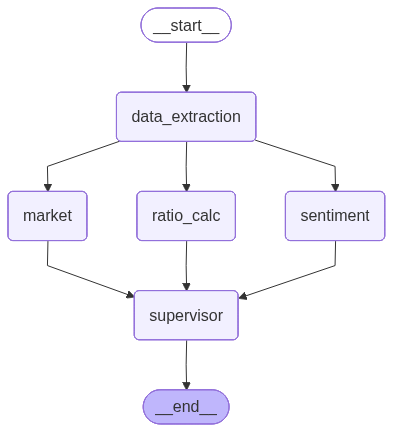

In [10]:
workflow

In [11]:
workflow.draw_mermaid_png("workflow_graph.png") 

AttributeError: 'CompiledStateGraph' object has no attribute 'draw_mermaid_png'

In [4]:
from youtube_search import YoutubeSearch

results = YoutubeSearch('AI agent development', max_results=5).to_dict()
# for video in results:
#     print(video['title'], video['url_suffix'])

# results

In [10]:
from youtube_search import YoutubeSearch
import json



def youtubesearchagent(search_trms:str):
    res= YoutubeSearch(search_terms=search_trms,max_results=5).to_json()

    res_json=json.loads(res)


    # for video in res_json['videos']:
    #     print(video['title'], video['url_suffix'])        

    print(res_json)



youtubesearchagent('C++ basics')






{'videos': [{'id': 'McojvctVsUs', 'thumbnails': ['https://i.ytimg.com/vi/McojvctVsUs/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBn7fFPwsPKi1LSNfyK_qQa8fu_jw', 'https://i.ytimg.com/vi/McojvctVsUs/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLCn-Hz5vIZh-agdfuZPXCHiCbVH7Q'], 'title': 'C++ Tutorial For Beginners | C++ Programming | C++ | C++ Basics | C++ For Beginners | Simplilearn', 'long_desc': None, 'channel': 'Simplilearn', 'duration': '26:30', 'views': '1,198,125 views', 'publish_time': '4 years ago', 'url_suffix': '/watch?v=McojvctVsUs&pp=ygUKQysrIGJhc2ljcw%3D%3D'}, {'id': 'MNeX4EGtR5Y', 'thumbnails': ['https://i.ytimg.com/vi/MNeX4EGtR5Y/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLDSv18A61bbarnsRI8h_tiC77fvOQ', 'https://i.ytimg.com/vi/MNeX4EGtR5Y/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLAbYxFxXoXL_wsosXYUyHiCanXq-Q'], 'title': 'C++ in 100 Seconds', 'long_desc': None, 'cha